# Removing Backgrounds in Images

In [216]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [251]:
!ls custom_dataset/classes

cheetos		coolranch.jpg	    original	    sourcream
cheetos_bg.jpg	nachocheese	    popcorn	    sourcream_bg.jpg
coolranch	nachocheese_bg.jpg  popcorn_bg.jpg


In [384]:
folder = "popcorn"

In [385]:
!ls custom_dataset/classes/$folder/processed

ls: cannot access 'custom_dataset/classes/popcorn/processed': No such file or directory


In [386]:
%matplotlib inline

In [387]:
!ls custom_dataset/classes/$folder

10.jpg	15.jpg	1.jpg	24.jpg	29.jpg	33.jpg	38.jpg	42.jpg	5.jpg
11.jpg	16.jpg	20.jpg	25.jpg	2.jpg	34.jpg	39.jpg	43.jpg	6.jpg
12.jpg	17.jpg	21.jpg	26.jpg	30.jpg	35.jpg	3.jpg	44.jpg	7.jpg
13.jpg	18.jpg	22.jpg	27.jpg	31.jpg	36.jpg	40.jpg	45.jpg	8.jpg
14.jpg	19.jpg	23.jpg	28.jpg	32.jpg	37.jpg	41.jpg	4.jpg	9.jpg


In [388]:
!ls custom_dataset/classes

cheetos		coolranch_bg.jpg    original	    sourcream
cheetos_bg.jpg	nachocheese	    popcorn	    sourcream_bg.jpg
coolranch	nachocheese_bg.jpg  popcorn_bg.jpg


In [389]:
"custom_dataset/classes/{}_bg.jpg".format(folder)

'custom_dataset/classes/popcorn_bg.jpg'

In [390]:
background = cv2.imread("custom_dataset/classes/{}_bg.jpg".format(folder))

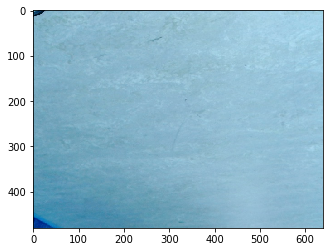

In [391]:
plt.imshow(background)

In [392]:
frame = cv2.imread("custom_dataset/classes/{}/11.jpg".format(folder))

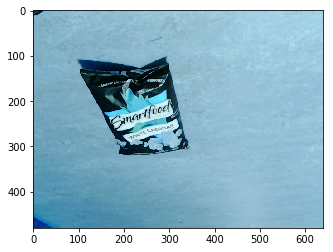

In [393]:
plt.imshow(frame)

In [440]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [441]:
sizes = stats[:, -1]

max_label = 1
max_size = sizes[1]
for i in range(2, nb_components):
    if sizes[i] > max_size:
        max_label = i
        max_size = sizes[i]

img2 = np.zeros(output.shape)
img2[output == max_label] = 255

In [488]:
def process(f):
    frame = cv2.imread("custom_dataset/classes/{}/{}".format(folder, f))
    THRESH = 0.1
    difference = np.absolute(np.subtract(frame, background))

    # filter the image
    KERNEL = (3,3)
    kernel = np.ones(KERNEL,np.uint8)
    filtered = cv2.erode(difference,kernel,iterations=1)
    filtered = cv2.dilate(filtered,kernel,iterations=1)

    # convert to grayscale
    filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

    # set as 0 for this range
    filtered = np.where(np.logical_and(0<=filtered, filtered<=THRESH), 0, filtered)
    filtered = np.where(np.logical_and(THRESH<filtered, filtered<=255), 255, filtered)
    
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(filtered)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    
    img = frame
    img[np.where(img2==0)] = 0
    return img

In [489]:
img = process("29.jpg")

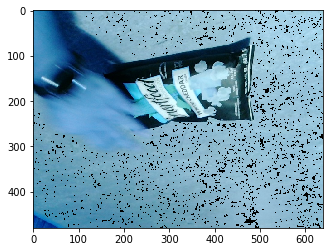

In [490]:
plt.imshow(img)

In [427]:
!mkdir custom_dataset/classes/$folder/processed/
for f in tqdm(os.listdir("custom_dataset/classes/{}/".format(folder))):
    if "jpg" in f:
        img = process(f)
        plt.imsave("custom_dataset/classes/{}/processed/{}".format(folder, f), img)

mkdir: cannot create directory ‘custom_dataset/classes/popcorn/processed/’: File exists


100%|██████████| 46/46 [00:01<00:00, 24.51it/s]


In [283]:
!ls custom_dataset/classes/$folder/processed/

0.jpg	14.jpg	19.jpg	23.jpg	28.jpg	32.jpg	37.jpg	41.jpg	46.jpg	7.jpg
10.jpg	15.jpg	1.jpg	24.jpg	29.jpg	33.jpg	38.jpg	42.jpg	47.jpg	8.jpg
11.jpg	16.jpg	20.jpg	25.jpg	2.jpg	34.jpg	39.jpg	43.jpg	48.jpg	9.jpg
12.jpg	17.jpg	21.jpg	26.jpg	30.jpg	35.jpg	3.jpg	44.jpg	4.jpg
13.jpg	18.jpg	22.jpg	27.jpg	31.jpg	36.jpg	40.jpg	45.jpg	6.jpg


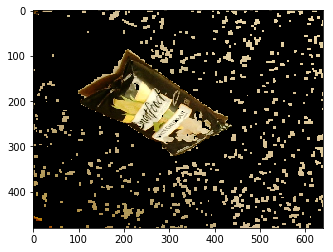

In [430]:
plt.imshow(cv2.imread("custom_dataset/classes/{}/processed/15.jpg".format(folder)))